# **Churn Bank Customer Prediction-using-Artificial-Neural-Networks**

# Importing Libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Loading Dataset

In [40]:
df=pd.read_csv("/content/Churn_Modelling.csv")

Data Analysis

In [41]:
# Checking size(rows,columns) of dataset
df.shape

(10000, 14)

In [42]:
#To display top 5 row in dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
#To display Bottom 5 rows
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# Data Cleaning

In [44]:
#drop RowNumber,customer id,Surname
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [45]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


**Missing Values**

In [47]:
#checking for null values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Finding Duplicate Values**

In [48]:
#checking for no of duplicate values
df.duplicated().sum()

0

In [49]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

# **EDA**

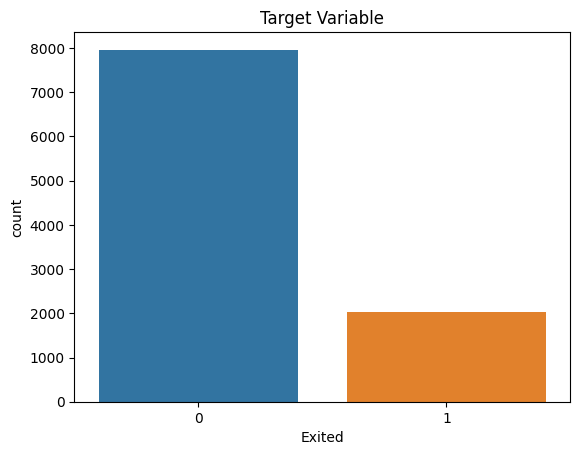

In [50]:
sns.countplot(x="Exited", data=df)
plt.title("Target Variable")
plt.show()

In [51]:
# percentage of class present in target variable(y)
print("percentage of 0 and 1\n",df["Exited"].value_counts()/len(df)*100)

percentage of 0 and 1
 0    79.63
1    20.37
Name: Exited, dtype: float64


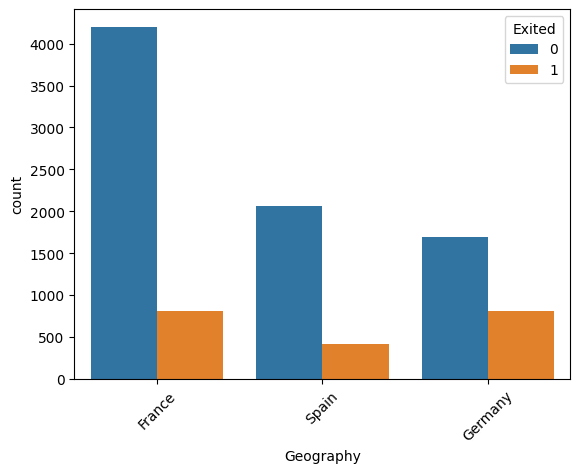

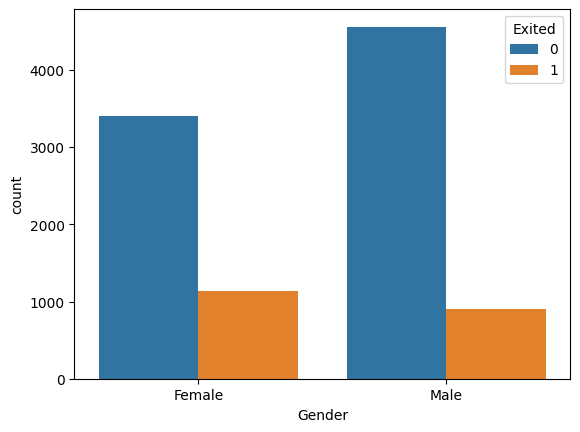

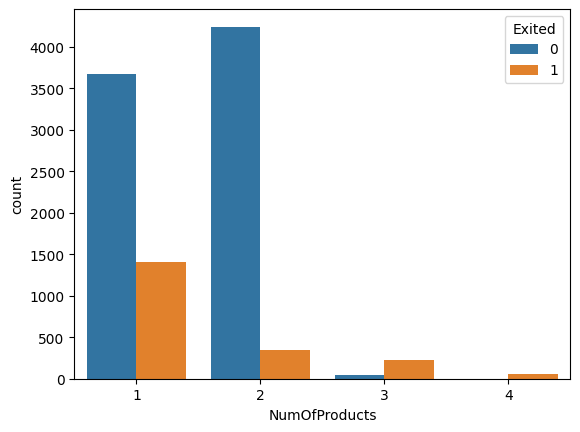

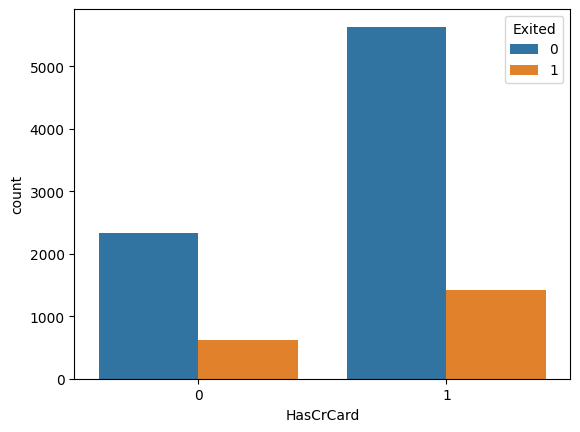

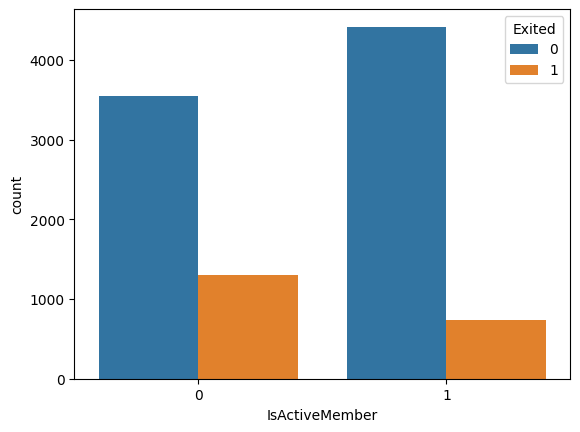

In [52]:
# Distribution of categorical variables
sns.countplot(x='Geography', data=df, hue='Exited')
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='Gender', data=df, hue='Exited')
plt.show()

sns.countplot(x='NumOfProducts', data=df, hue='Exited')
plt.show()

sns.countplot(x='HasCrCard', data=df, hue='Exited')
plt.show()

sns.countplot(x='IsActiveMember', data=df, hue='Exited')
plt.show()







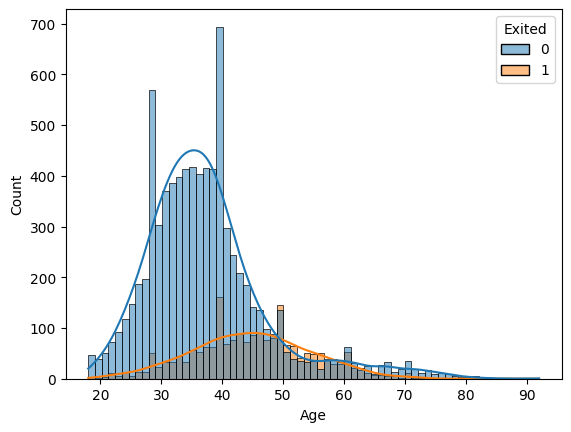

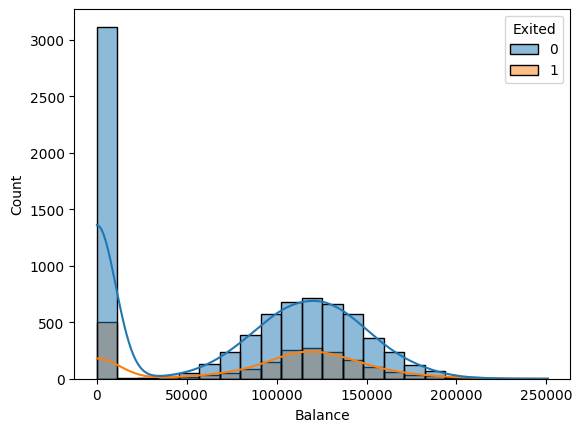

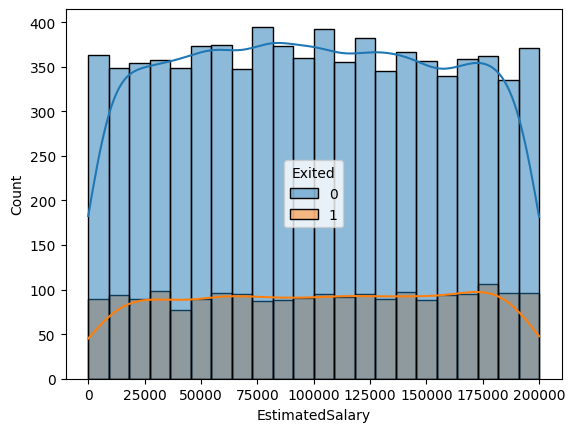

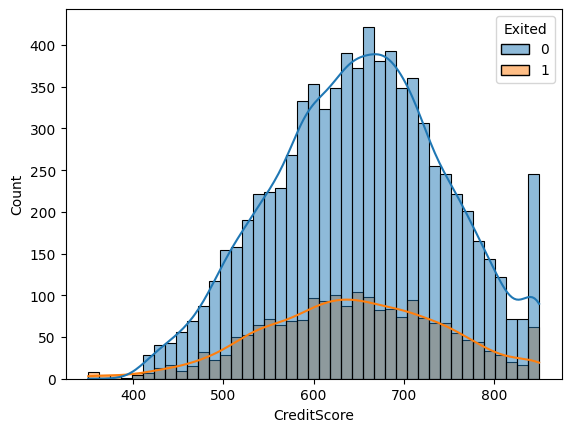

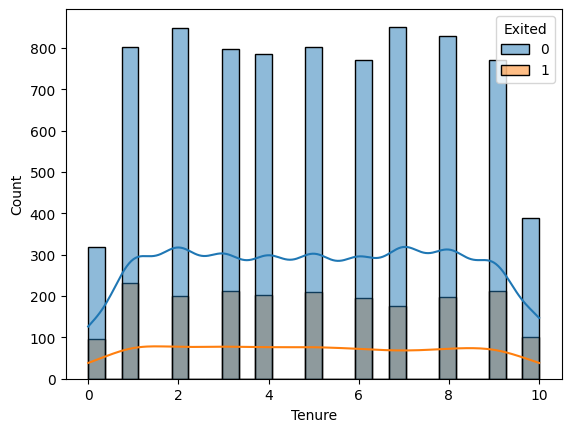

In [53]:
sns.histplot(data=df, x='Age',hue='Exited', kde=True)
plt.show()

sns.histplot(data=df, x='Balance',hue='Exited', kde=True)
plt.show()

sns.histplot(data=df, x='EstimatedSalary',hue='Exited', kde=True)
plt.show()

sns.histplot(data=df, x='CreditScore',hue='Exited', kde=True)
plt.show()

sns.histplot(data=df, x='Tenure',hue='Exited', kde=True)
plt.show()



**ENCODING**

In [54]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [55]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [56]:
from sklearn.preprocessing import LabelEncoder
# encode categorical variables
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [57]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


# Feature and Target Selection

In [58]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [59]:
# X --> Feature y-- >target
X=df.drop('Exited',axis='columns')
y=df['Exited']

In [60]:
print(X)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  


In [61]:
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


**Spliting**

In [62]:
# splitting the data as train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 3 )

In [64]:
#Balancing the data
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
X_train, y_train = smt.fit_resample(X_train, y_train)

In [67]:
len(X_train),len(y_train)

(5226, 5226)

**Scaling**

In [68]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)#only transform the test dataset, dont fit it

In [69]:
X_train_scaled.shape

(5226, 10)

In [70]:
X_test_scaled.shape

(2000, 10)

In [71]:
len(X_train.columns)

10

# MODEL

In [72]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
 keras.layers.Dense(20, input_shape=(10,), activation='relu'),
 keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
164/164 [==============================] - 1s 4ms/step - loss: 0.6131 - accuracy: 0.6783
Epoch 2/100
164/164 [==============================] - 1s 4ms/step - loss: 0.4828 - accuracy: 0.7710
Epoch 3/100
164/164 [==============================] - 1s 4ms/step - loss: 0.4520 - accuracy: 0.7842
Epoch 4/100
164/164 [==============================] - 1s 4ms/step - loss: 0.4388 - accuracy: 0.7937
Epoch 5/100
164/164 [==============================] - 1s 4ms/step - loss: 0.4285 - accuracy: 0.7981
Epoch 6/100
164/164 [==============================] - 1s 5ms/step - loss: 0.4198 - accuracy: 0.8031
Epoch 7/100
164/164 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.8079
Epoch 8/100
164/164 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8104
Epoch 9/100
164/164 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8127
Epoch 10/100
164/164 [==============================] - 0s 2ms/step - loss: 0.3956 - accura

In [73]:
model.evaluate(X_test_scaled,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.4811 - accuracy: 0.7930


[0.48109719157218933, 0.7929999828338623]

In [74]:
y_pred=model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [75]:
print(y_pred.shape)
print(y_pred[0])

(2000, 1)
[1.]


In [76]:
print(y_pred)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [77]:
y_test

5876    0
6555    0
1448    1
3351    0
231     0
       ..
869     0
2928    1
8436    0
6312    0
7195    0
Name: Exited, Length: 2000, dtype: int64

In [78]:
y_prediction=[]
for elements in y_pred:
 if elements>0.5:
   y_prediction.append(1)
 else:
   y_prediction.append(0)

In [79]:
y_prediction[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [80]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.67      0.00      0.00      1605
           1       0.20      1.00      0.33       395

    accuracy                           0.20      2000
   macro avg       0.43      0.50      0.17      2000
weighted avg       0.57      0.20      0.07      2000



Text(95.72222222222221, 0.5, 'Truth')

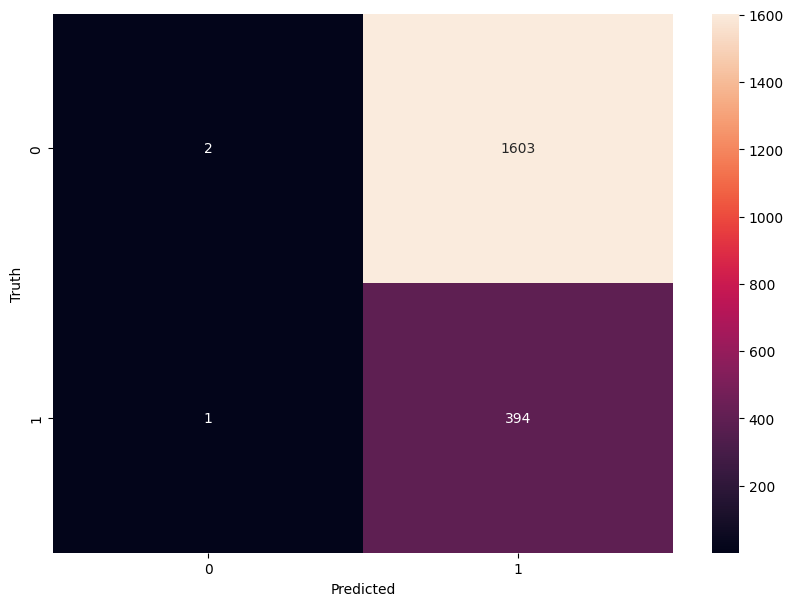

In [81]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_prediction)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')